<a href="https://colab.research.google.com/github/Praisy-E/Code-for-all/blob/main/Thresholding%2C_Binarization_%26_Adaptive_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


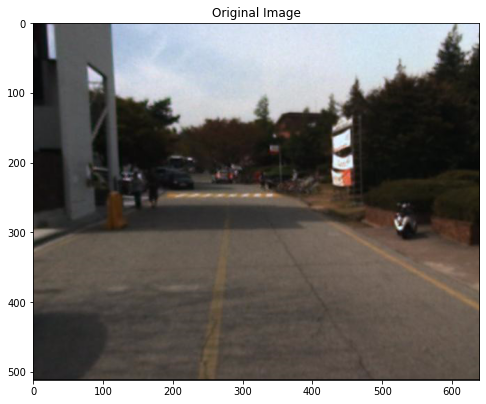

In [5]:
import cv2
import numpy as np

image = cv2.imread('/content/drive/MyDrive/GAN/visible-train/I01239.jpg')
imshow('Original Image', image)


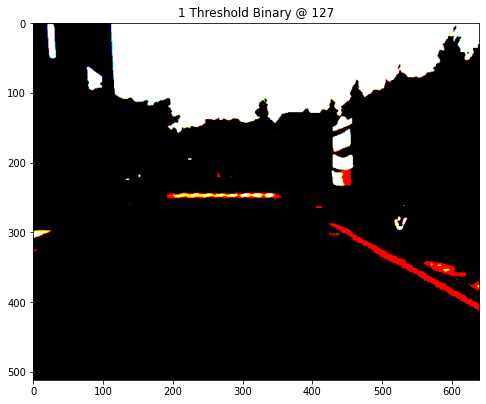

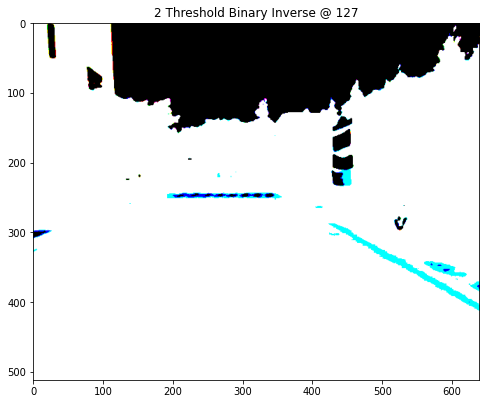

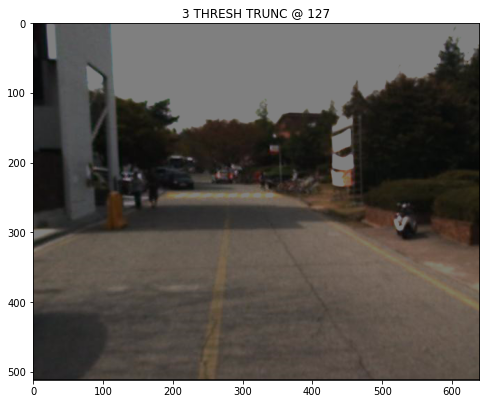

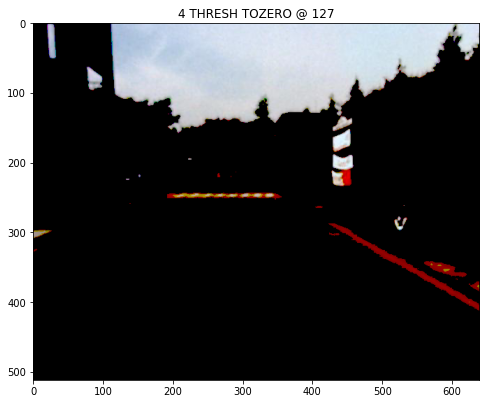

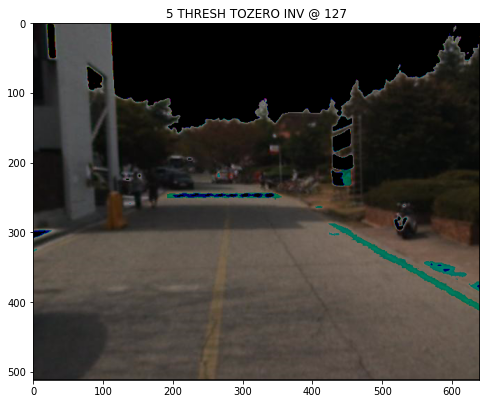

In [7]:

# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary Inverse @ 127', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 THRESH TRUNC @ 127', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 THRESH TOZERO @ 127', thresh4)

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

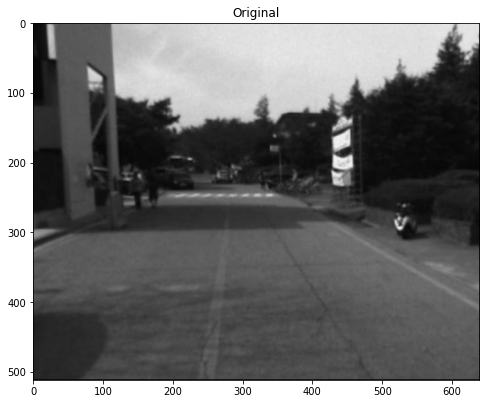

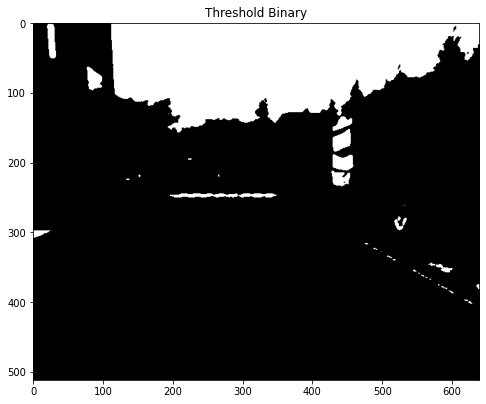

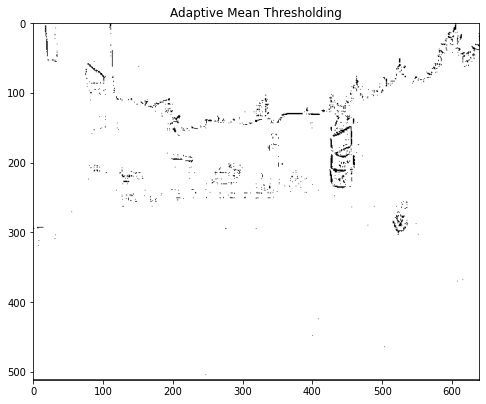

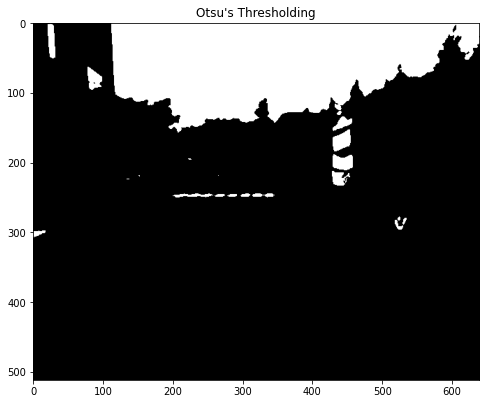

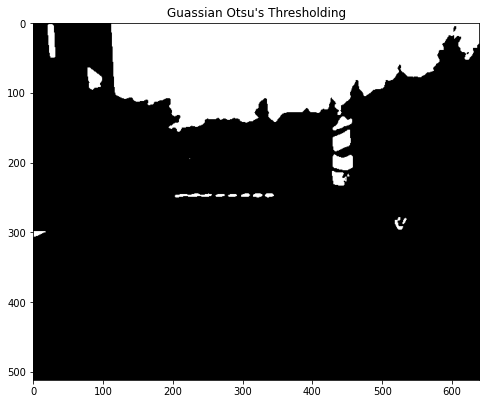

In [8]:
image = cv2.imread('/content/drive/MyDrive/GAN/visible-train/I01239.jpg',0)
imshow("Original", image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow("Adaptive Mean Thresholding", thresh) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassian Otsu's Thresholding", th3) 

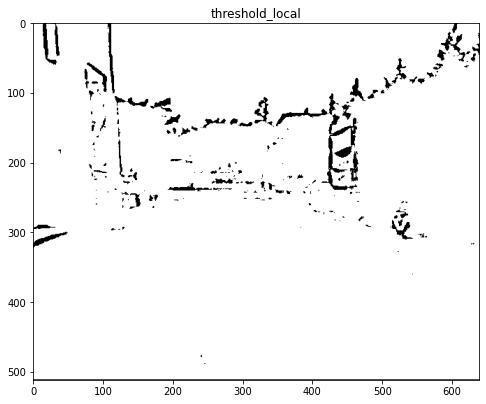

In [9]:
from skimage.filters import threshold_local

image = cv2.imread('/content/drive/MyDrive/GAN/visible-train/I01239.jpg')

# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)